In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [211]:
random.seed(42)

In [212]:
data = pd.read_csv('final_df_BGM.csv')

In [213]:
data.head()

,year,"(51, 49, 49)","(120, 117, 105)","(187, 163, 128)","(128, 79, 53)","(215, 208, 198)","(21, 21, 23)","(54, 73, 93)",R1,G1,...,G7,B7,Count7,count,line_length,straight_lines_count,straight_lines_length,circle_count,normalized_radius_sum,madness
0,1882,11094,641,1790,184,357,11059,1324,41,56,...,81,74,1882,2,0.078886,0.000772,19098.320525,151,0.041514,0.020408
1,1883,326,874,3297,1320,765,133,16,178,147,...,43,46,521,1,0.058533,0.000225,4216.292051,127,0.046067,0.040816
2,1885,6859,719,192,120,372,2239,439,66,72,...,59,43,350,1,0.150776,0.001736,41927.182386,176,0.047528,0.061224
3,1886,5679,419,1154,591,29,4666,473,44,50,...,77,57,299,1,0.141838,0.001411,36577.024363,130,0.047107,0.081633
4,1888,2894,483,476,1456,23,1693,16,65,61,...,83,37,767,1,0.120445,0.000980,22464.292472,193,0.046078,0.102041


### linear dependances clean up

In [214]:
data.rename(columns={'(51, 49, 49)': 'gray',
             '(120, 117, 105)': 'light_gray',
             '(187, 163, 128)': 'beige',
             '(128, 79, 53)': 'brown',
             '(215, 208, 198)': 'white',
             '(21, 21, 23)': 'black',
             '(54, 73, 93)': 'blue'},
             inplace=True)

In [215]:
y = data['madness']
# data = data.drop(columns=['madness', 'year'])

In [216]:
data.head()

,year,gray,light_gray,beige,brown,white,black,blue,R1,G1,...,G7,B7,Count7,count,line_length,straight_lines_count,straight_lines_length,circle_count,normalized_radius_sum,madness
0,1882,11094,641,1790,184,357,11059,1324,41,56,...,81,74,1882,2,0.078886,0.000772,19098.320525,151,0.041514,0.020408
1,1883,326,874,3297,1320,765,133,16,178,147,...,43,46,521,1,0.058533,0.000225,4216.292051,127,0.046067,0.040816
2,1885,6859,719,192,120,372,2239,439,66,72,...,59,43,350,1,0.150776,0.001736,41927.182386,176,0.047528,0.061224
3,1886,5679,419,1154,591,29,4666,473,44,50,...,77,57,299,1,0.141838,0.001411,36577.024363,130,0.047107,0.081633
4,1888,2894,483,476,1456,23,1693,16,65,61,...,83,37,767,1,0.120445,0.000980,22464.292472,193,0.046078,0.102041


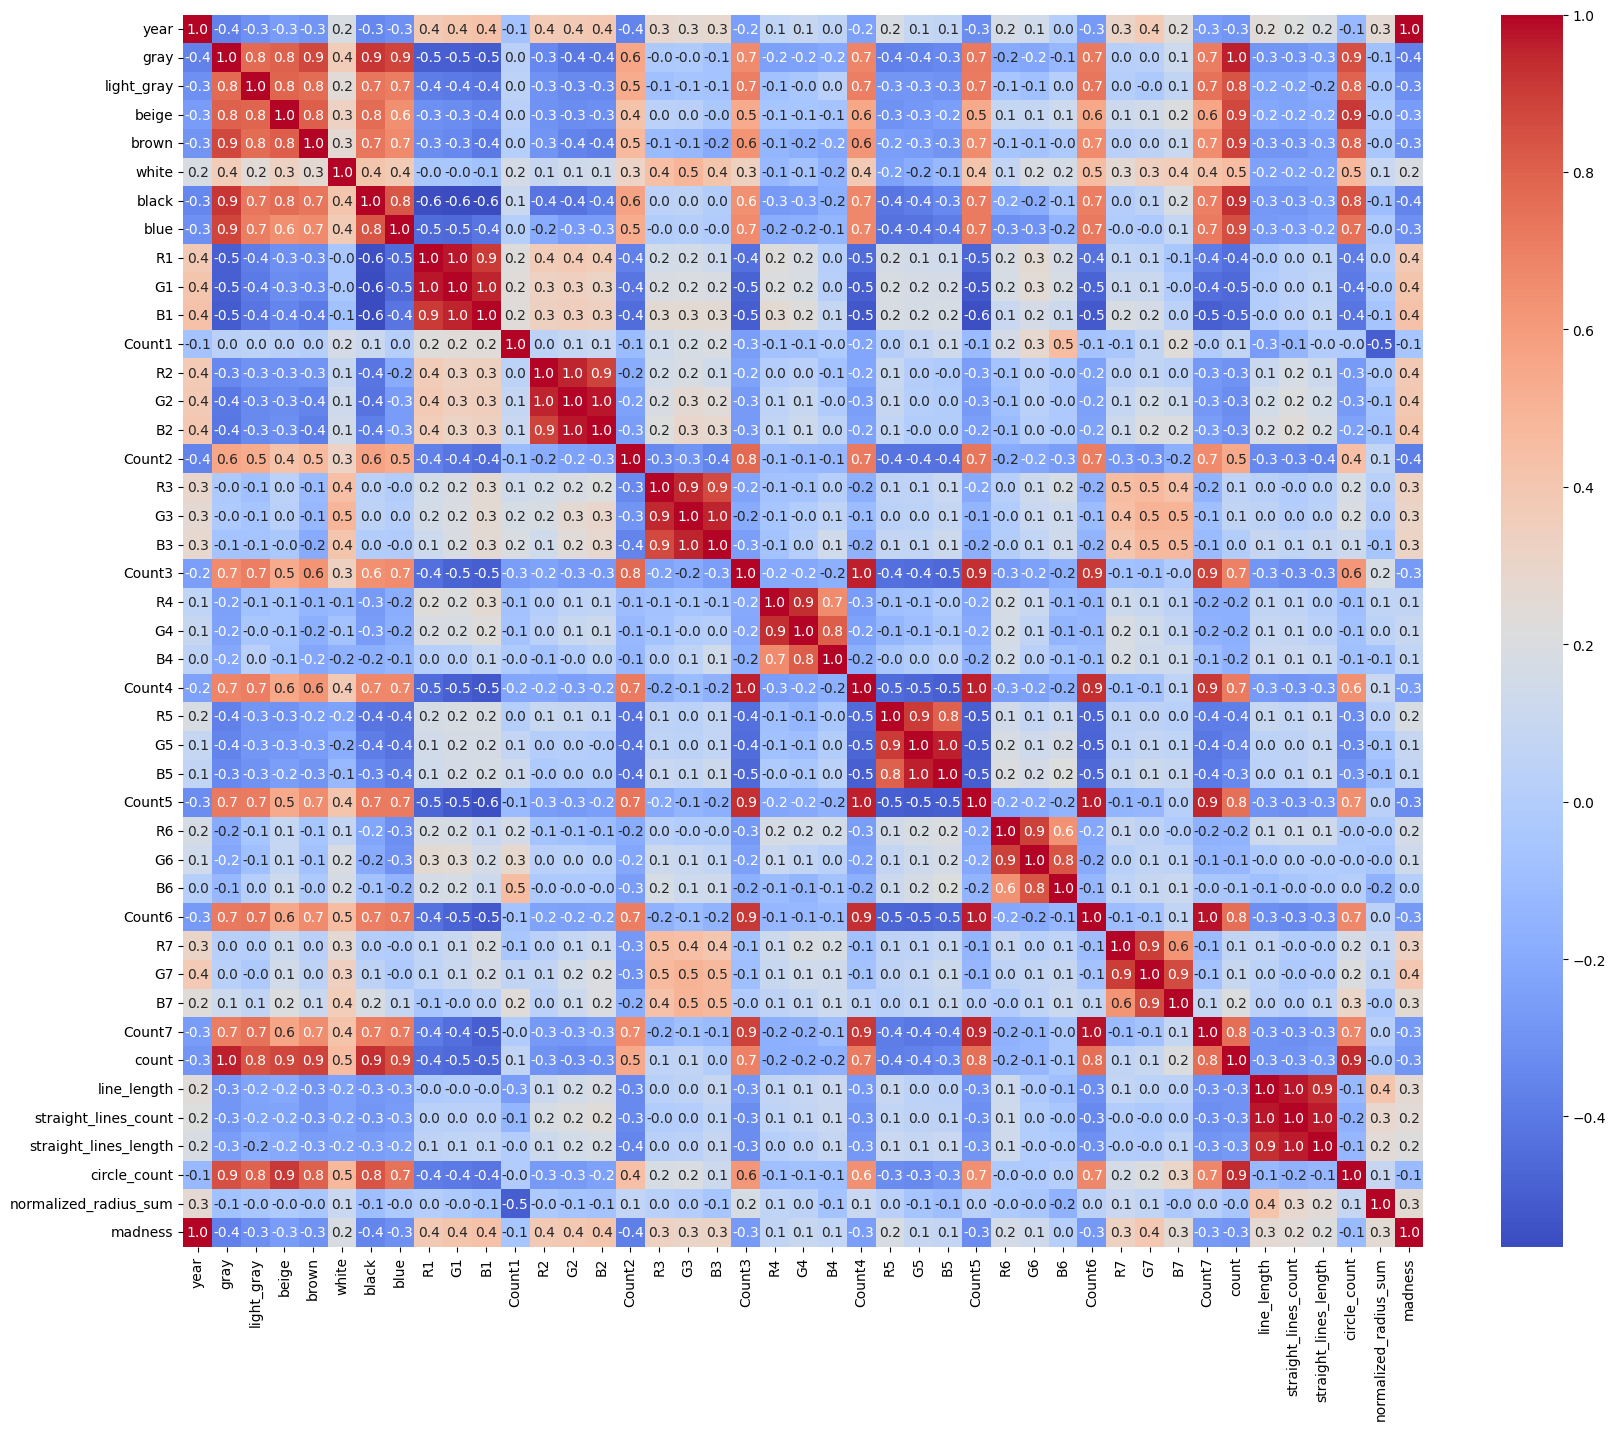

In [217]:
plt.figure(figsize=(20, 16))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt='.1f')
plt.show()

line_length коррелирует с straight_lines_count и straight_lines_length => удалить последние 2

In [218]:
data = data.drop(columns=['straight_lines_count', 'straight_lines_length'])
data.shape

(49, 41)

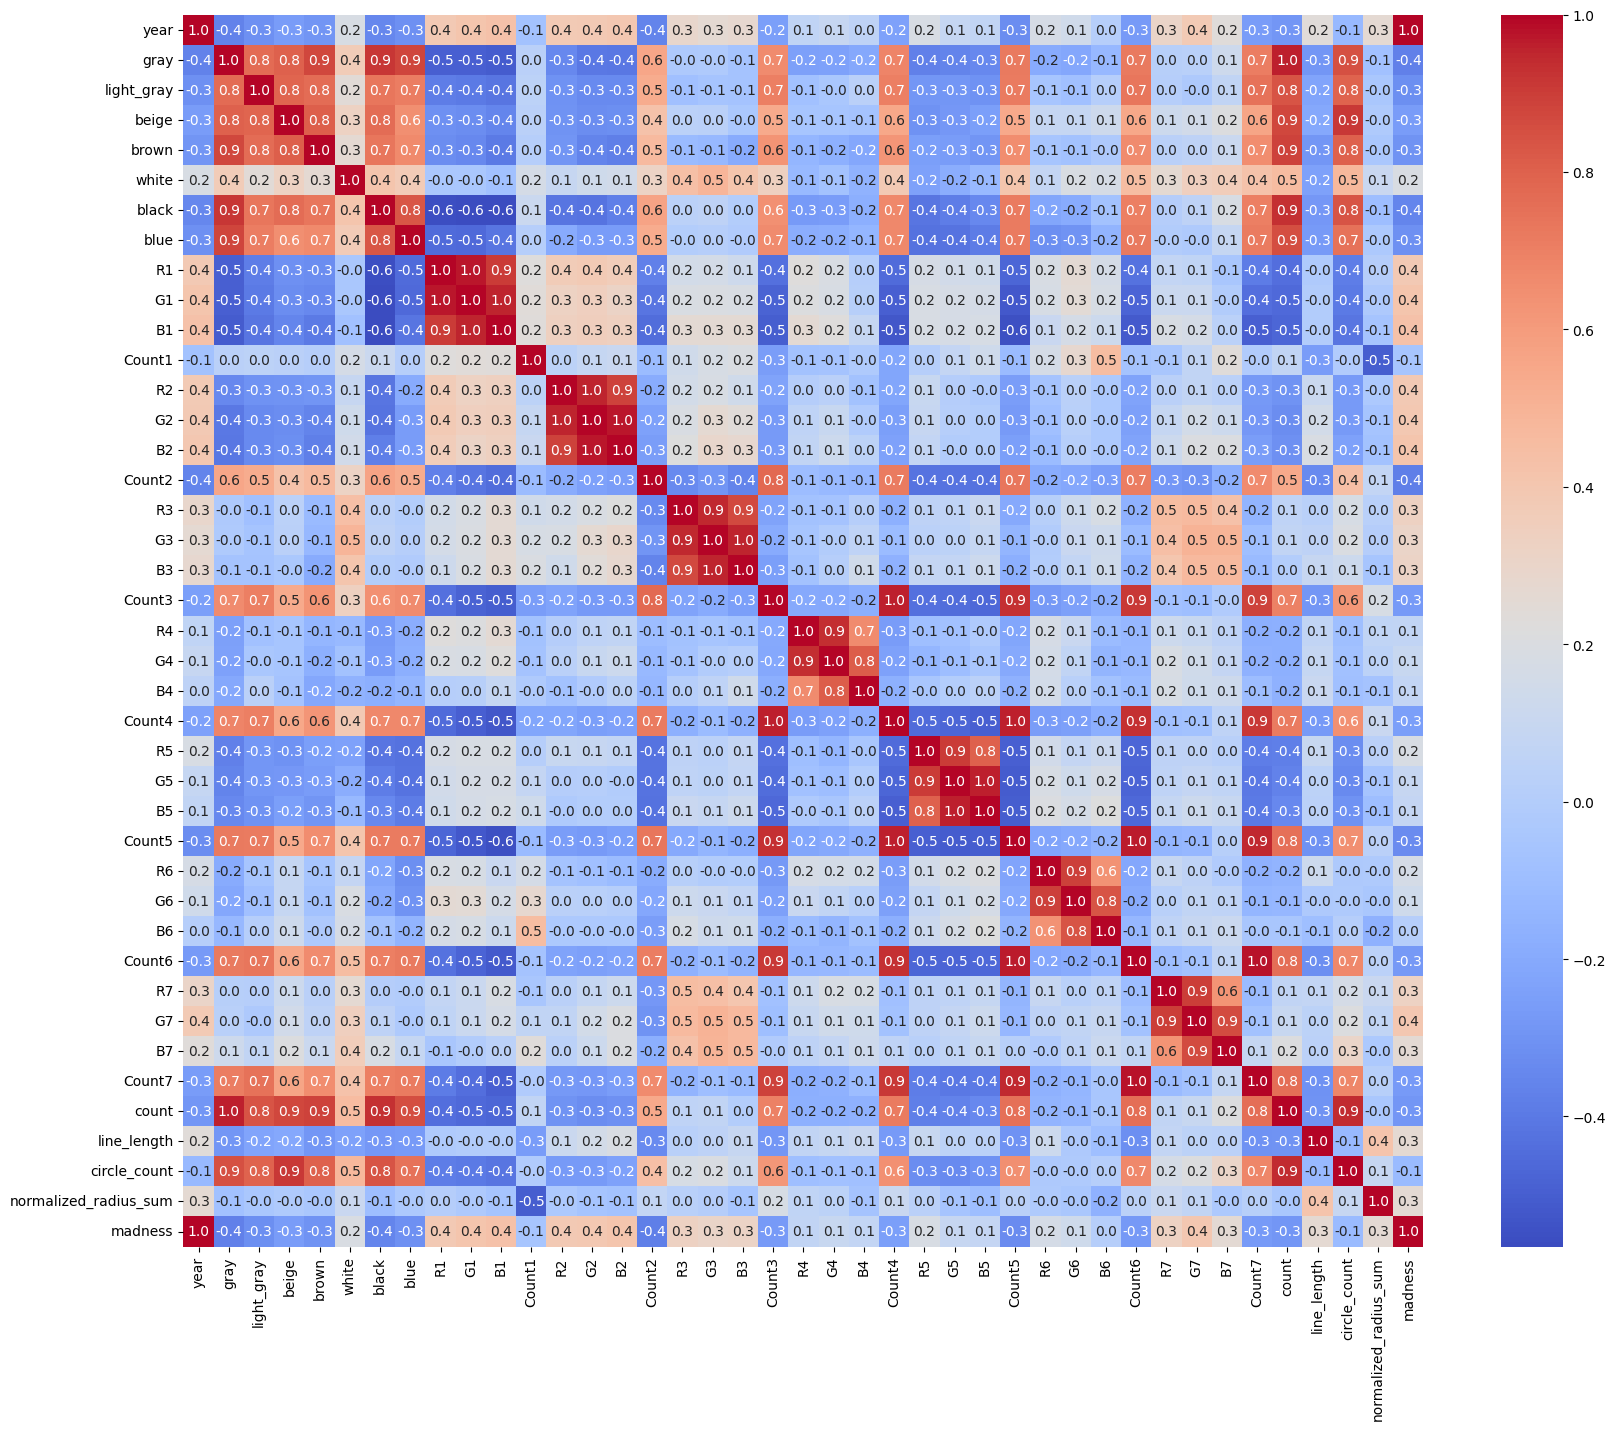

In [219]:
plt.figure(figsize=(20, 16))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt='.1f')
plt.show()

In [220]:
def mean_RGB(data: pd.DataFrame) -> pd.DataFrame:
    """
    count the mean value of RGB_i
    """
    k = 7
    for i in range(1, k + 1):
        data[f'RGB{i}'] = (data[f'R{i}'] + data[f'G{i}'] + data[f'B{i}']) / 3
    return data

Count_i - коррелируют во всех представлениях, даже в нормированном, поэтому удалям 

In [221]:
data.drop(columns=['Count1', 'Count2', 'Count3', 'Count4', 'Count5', 'Count6', 'Count7'], inplace=True)

In [222]:
data.columns

Index(['year', 'gray', 'light_gray', 'beige', 'brown', 'white', 'black',
       'blue', 'R1', 'G1', 'B1', 'R2', 'G2', 'B2', 'R3', 'G3', 'B3', 'R4',
       'G4', 'B4', 'R5', 'G5', 'B5', 'R6', 'G6', 'B6', 'R7', 'G7', 'B7',
       'count', 'line_length', 'circle_count', 'normalized_radius_sum',
       'madness'],
      dtype='object')

In [223]:
data = mean_RGB(data)

In [224]:
data.drop(columns=['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7',
                   'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7',
                   'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7'], 
                   inplace=True)
data.columns

Index(['year', 'gray', 'light_gray', 'beige', 'brown', 'white', 'black',
       'blue', 'count', 'line_length', 'circle_count', 'normalized_radius_sum',
       'madness', 'RGB1', 'RGB2', 'RGB3', 'RGB4', 'RGB5', 'RGB6', 'RGB7'],
      dtype='object')

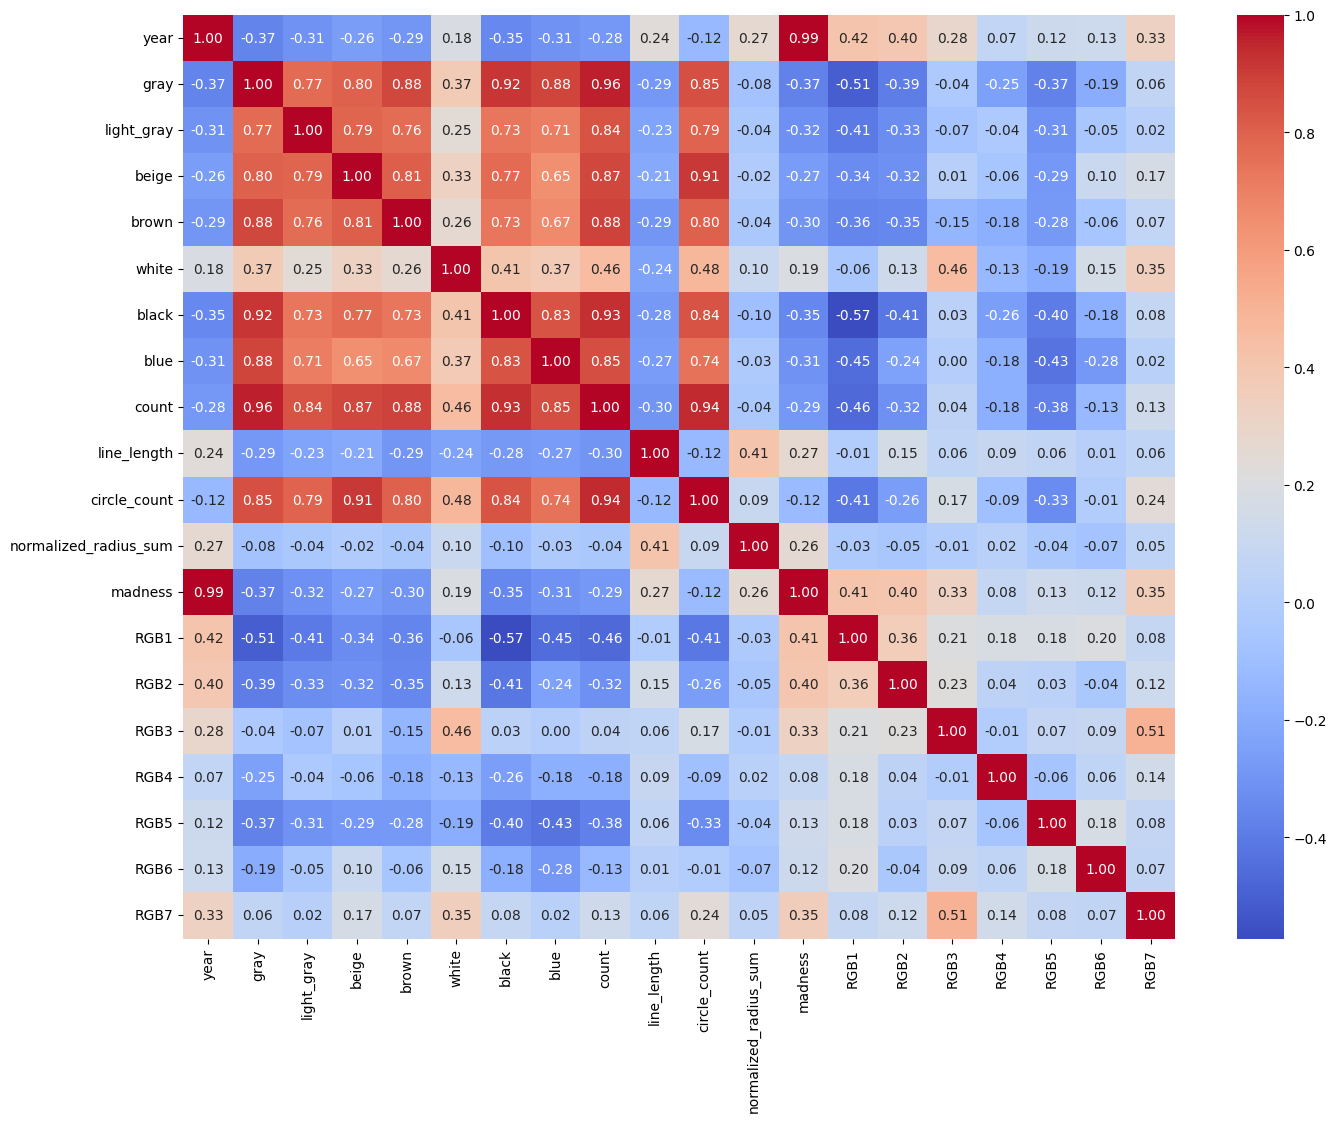

In [225]:
plt.figure(figsize=(16, 12))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.show()

Объединяем цвета по группам - светлые и темные

In [226]:
data['dark_colors'] = data['gray'] + data['light_gray'] + data['black'] + data['brown'] + data['blue']  # кол-во пискселей самых популярных цветов темных оттенков

In [227]:
data['light_colors'] = data['white'] + data['beige']  # кол-во пикселей самых популярных цветов светлых оттенков

In [228]:
data.drop(columns=['gray', 'black', 'light_gray', 'white', 'beige', 'brown', 'blue'],
          inplace=True)

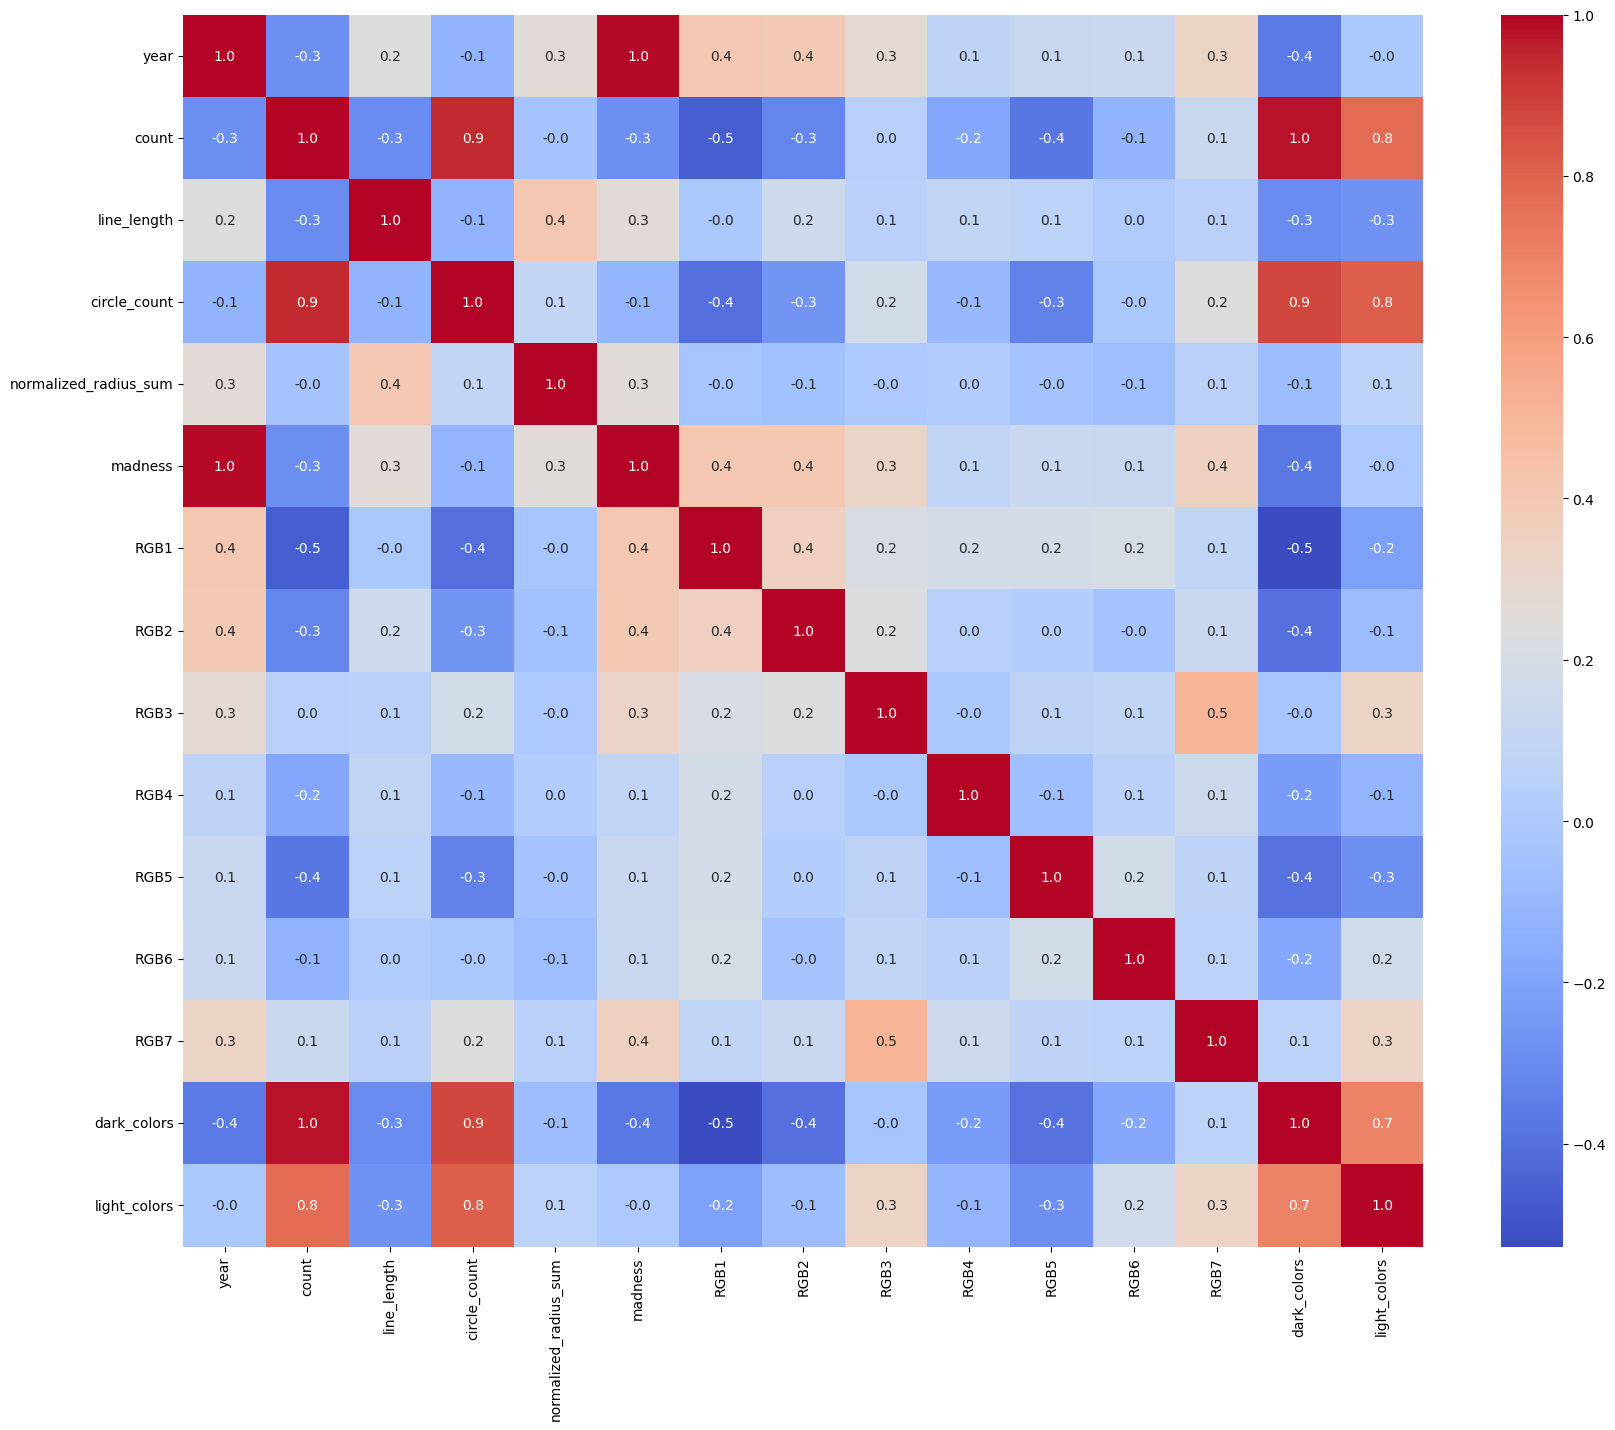

In [229]:
plt.figure(figsize=(20, 16))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt='.1f')
plt.show()

count и circle_count все равно коррелируют с другими переменными, поэтому избавляемся от них

In [230]:
data.drop(columns=['count', 'circle_count'], inplace=True)

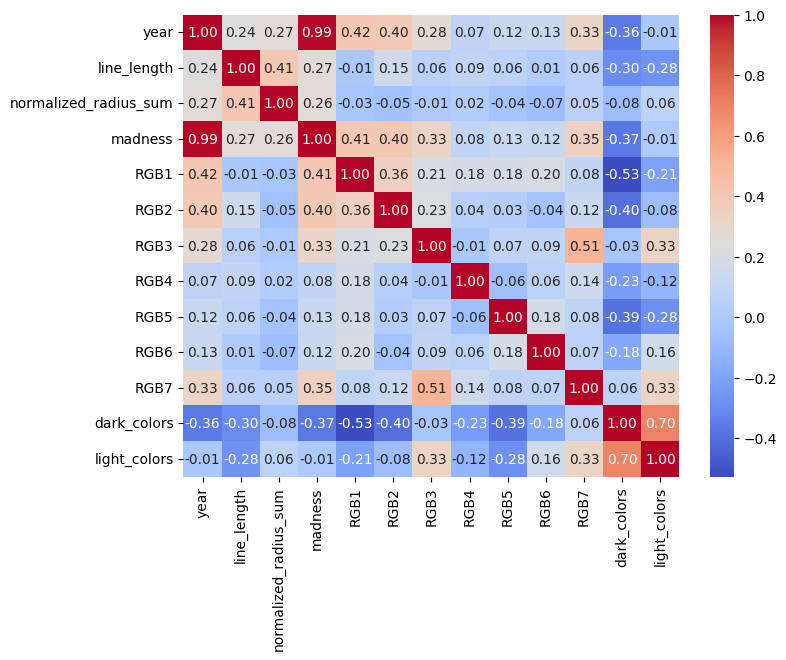

In [231]:
plt.figure(figsize=(8, 6))
# sns.heatmap(data.drop(columns=['year', 'madness']).corr(), annot=True, cmap="coolwarm", fmt='.2f')
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.show()

Итого осталось 11 фичей

In [232]:
data.head()

,year,line_length,normalized_radius_sum,madness,RGB1,RGB2,RGB3,RGB4,RGB5,RGB6,RGB7,dark_colors,light_colors
0,1882,0.078886,0.041514,0.020408,53.000000,12.000000,37.666667,68.000000,21.333333,160.333333,82.666667,24302,2147
1,1883,0.058533,0.046067,0.040816,147.333333,107.333333,80.000000,135.333333,211.666667,155.000000,48.333333,2669,4062
2,1885,0.150776,0.047528,0.061224,67.333333,46.666667,38.666667,147.000000,190.333333,119.333333,62.000000,10376,564
3,1886,0.141838,0.047107,0.081633,49.000000,41.333333,99.666667,21.666667,156.000000,151.333333,85.000000,11828,1183
4,1888,0.120445,0.046078,0.102041,59.666667,91.666667,94.666667,148.333333,35.333333,136.333333,87.666667,6542,499


In [233]:
data.to_csv('processed_df_BGM.csv')

### augmentation

In [234]:
data = pd.read_csv('processed_df_BGM.csv', index_col=0)

In [235]:
data.columns

Index(['year', 'line_length', 'normalized_radius_sum', 'madness', 'RGB1',
       'RGB2', 'RGB3', 'RGB4', 'RGB5', 'RGB6', 'RGB7', 'dark_colors',
       'light_colors'],
      dtype='object')

Чтобы сохранить показатель madness, будем добавлять шум только в одну переменную

#### line_length

In [236]:
line_length_std = data.line_length.std()

/var/folders/60/_l0csbys1fb0_r6rqk2whzgh0000gn/T/ipykernel_30542/366995192.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.line_length)


<Axes: xlabel='line_length', ylabel='Density'>

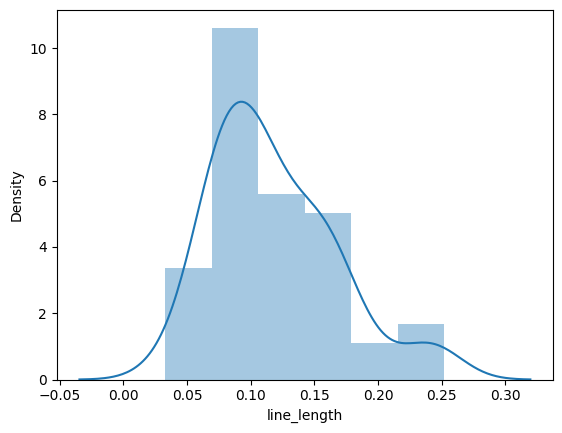

In [237]:
sns.distplot(data.line_length)

In [238]:
# рандомно выбираем индексы для добавления шума в фичу line_length 
idxs = random.choices([i for i in range(data.shape[0])], k=20)

data_1 = data.iloc[idxs].copy()
data_1['line_length'] = data_1['line_length'] + [random.uniform(-line_length_std, line_length_std) for _ in range(20)]

In [239]:
data_1

,year,line_length,normalized_radius_sum,madness,RGB1,RGB2,RGB3,RGB4,RGB5,RGB6,RGB7,dark_colors,light_colors
31,1918,0.198289,0.047811,0.653061,44.000000,75.333333,66.000000,161.666667,39.333333,113.666667,103.666667,9194,30
1,1883,0.077940,0.046067,0.040816,147.333333,107.333333,80.000000,135.333333,211.666667,155.000000,48.333333,2669,4062
13,1898,0.052599,0.046611,0.285714,57.666667,69.000000,41.666667,65.000000,130.000000,91.666667,63.666667,65841,4507
10,1895,0.062866,0.046473,0.224490,58.666667,135.000000,33.666667,28.666667,24.333333,101.666667,60.666667,76536,7965
36,1924,0.117502,0.045138,0.755102,113.666667,43.333333,63.666667,143.666667,75.333333,89.333333,141.333333,13760,1185
33,1921,0.153661,0.049881,0.693878,85.333333,104.333333,40.666667,108.666667,191.666667,137.666667,167.333333,4544,750
43,1935,0.024514,0.047905,0.897959,179.666667,46.666667,132.000000,108.000000,215.000000,82.333333,173.000000,2379,2169
4,1888,0.080945,0.046078,0.102041,59.666667,91.666667,94.666667,148.333333,35.333333,136.333333,87.666667,6542,499
20,1905,0.106195,0.048344,0.428571,134.666667,178.666667,70.333333,45.333333,47.000000,70.666667,48.000000,40401,6067
1,1883,0.068692,0.046067,0.040816,147.333333,107.333333,80.000000,135.333333,211.666667,155.000000,48.333333,2669,4062


#### normalized_radius_sum

In [240]:
nrs_std = data.normalized_radius_sum.std()
nrs_std

0.003071529730158292

/var/folders/60/_l0csbys1fb0_r6rqk2whzgh0000gn/T/ipykernel_30542/3622137095.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.normalized_radius_sum)


<Axes: xlabel='normalized_radius_sum', ylabel='Density'>

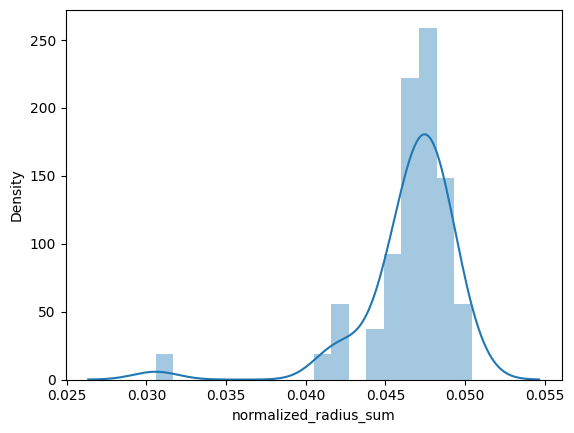

In [241]:
sns.distplot(data.normalized_radius_sum)

In [242]:
idxs = random.choices([i for i in range(data.shape[0])], k=20)

data_2 = data.iloc[idxs].copy()
data_2['normalized_radius_sum'] = data_2['normalized_radius_sum'] + [random.uniform(-nrs_std, nrs_std) for _ in range(20)]

In [243]:
data_2

,year,line_length,normalized_radius_sum,madness,RGB1,RGB2,RGB3,RGB4,RGB5,RGB6,RGB7,dark_colors,light_colors
34,1922,0.196987,0.048320,0.714286,66.000000,202.333333,139.333333,119.333333,32.333333,65.666667,137.000000,5972,259
2,1885,0.150776,0.048388,0.061224,67.333333,46.666667,38.666667,147.000000,190.333333,119.333333,62.000000,10376,564
11,1896,0.149285,0.047763,0.244898,13.000000,107.000000,52.333333,63.333333,135.000000,136.000000,152.333333,28361,3981
14,1899,0.081902,0.047765,0.306122,48.000000,39.666667,120.666667,96.000000,61.000000,44.666667,211.333333,119300,15817
3,1886,0.141838,0.049213,0.081633,49.000000,41.333333,99.666667,21.666667,156.000000,151.333333,85.000000,11828,1183
11,1896,0.149285,0.049108,0.244898,13.000000,107.000000,52.333333,63.333333,135.000000,136.000000,152.333333,28361,3981
4,1888,0.120445,0.044413,0.102041,59.666667,91.666667,94.666667,148.333333,35.333333,136.333333,87.666667,6542,499
13,1898,0.068246,0.043737,0.285714,57.666667,69.000000,41.666667,65.000000,130.000000,91.666667,63.666667,65841,4507
31,1918,0.168335,0.046678,0.653061,44.000000,75.333333,66.000000,161.666667,39.333333,113.666667,103.666667,9194,30
17,1902,0.107139,0.044806,0.367347,27.000000,35.000000,157.333333,116.333333,36.333333,177.333333,198.666667,139737,28200


#### RGB1

In [244]:
rgb1_std = data.RGB1.std()
rgb1_std

59.10905102500244

/var/folders/60/_l0csbys1fb0_r6rqk2whzgh0000gn/T/ipykernel_30542/2404228802.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.RGB1)


<Axes: xlabel='RGB1', ylabel='Density'>

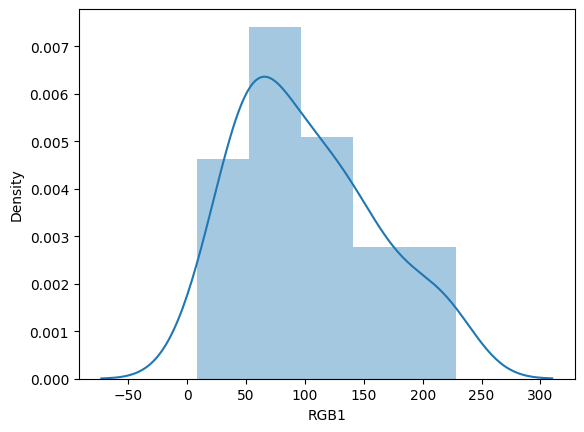

In [245]:
sns.distplot(data.RGB1)

In [246]:
idxs = random.choices([i for i in range(data.shape[0])], k=20)

data_3 = data.iloc[idxs].copy()
data_3['RGB1'] = data_3['RGB1'] + [random.uniform(-rgb1_std, rgb1_std) for _ in range(20)]

#### RGB2

64.74549716290903


/var/folders/60/_l0csbys1fb0_r6rqk2whzgh0000gn/T/ipykernel_30542/762830446.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.RGB2)


<Axes: xlabel='RGB2', ylabel='Density'>

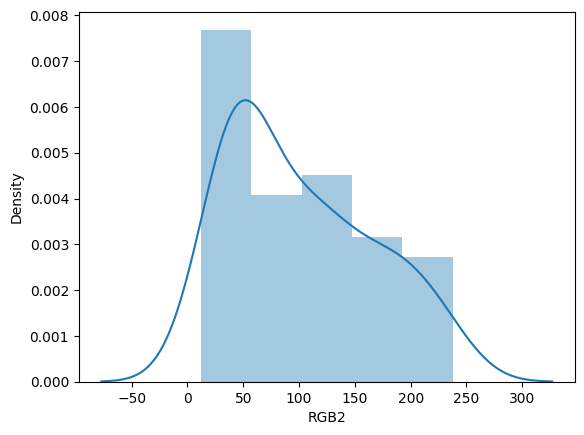

In [247]:
rgb2_std = data.RGB2.std()
print(rgb2_std)

sns.distplot(data.RGB2)

In [248]:
idxs = random.choices([i for i in range(data.shape[0])], k=20)

data_4 = data.iloc[idxs].copy()
data_4['RGB2'] = data_4['RGB2'] + [random.uniform(-rgb2_std, rgb2_std) for _ in range(20)]

#### RGB3

59.02244567086764


/var/folders/60/_l0csbys1fb0_r6rqk2whzgh0000gn/T/ipykernel_30542/4193866447.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.RGB3)


<Axes: xlabel='RGB3', ylabel='Density'>

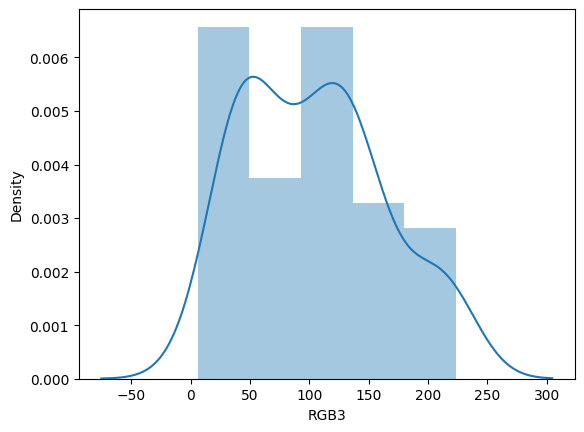

In [249]:
rgb3_std = data.RGB3.std()
print(rgb3_std)

sns.distplot(data.RGB3)

In [250]:
idxs = random.choices([i for i in range(data.shape[0])], k=20)

data_5 = data.iloc[idxs].copy()
data_5['RGB3'] = data_5['RGB3'] + [random.uniform(-rgb3_std, rgb3_std) for _ in range(20)]

#### RGB4

47.901911856271624


/var/folders/60/_l0csbys1fb0_r6rqk2whzgh0000gn/T/ipykernel_30542/1724026118.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.RGB4)


<Axes: xlabel='RGB4', ylabel='Density'>

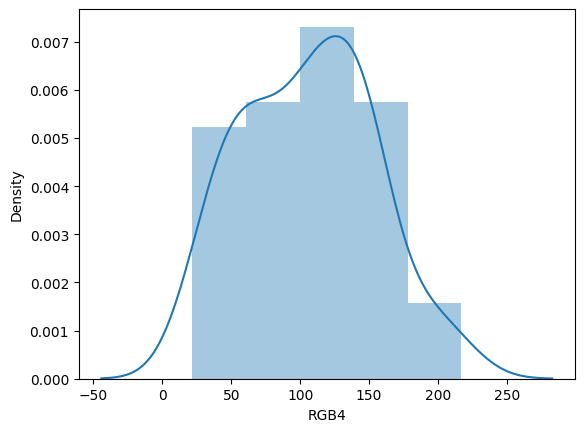

In [251]:
rgb4_std = data.RGB4.std()
print(rgb4_std)

sns.distplot(data.RGB4)

In [252]:
idxs = random.choices([i for i in range(data.shape[0])], k=20)

data_6 = data.iloc[idxs].copy()
data_6['RGB4'] = data_6['RGB4'] + [random.uniform(-rgb4_std, rgb4_std) for _ in range(20)]

#### RGB5

57.79249523656972


/var/folders/60/_l0csbys1fb0_r6rqk2whzgh0000gn/T/ipykernel_30542/941076032.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.RGB5)


<Axes: xlabel='RGB5', ylabel='Density'>

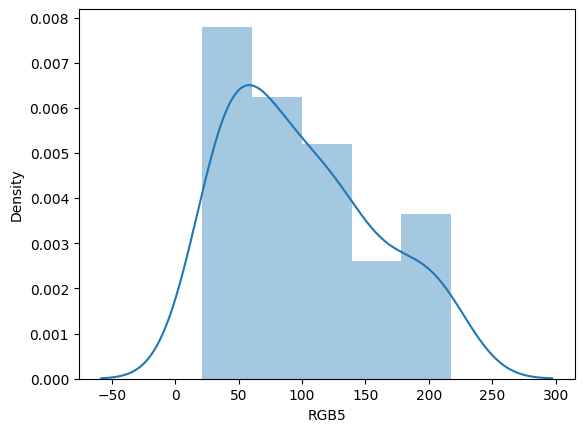

In [253]:
rgb5_std = data.RGB5.std()
print(rgb5_std)

sns.distplot(data.RGB5)

In [254]:
idxs = random.choices([i for i in range(data.shape[0])], k=20)

data_7 = data.iloc[idxs].copy()
data_7['RGB5'] = data_7['RGB5'] + [random.uniform(-rgb5_std, rgb5_std) for _ in range(20)]

#### RGB6

52.94194630687838


/var/folders/60/_l0csbys1fb0_r6rqk2whzgh0000gn/T/ipykernel_30542/2111560135.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.RGB6)


<Axes: xlabel='RGB6', ylabel='Density'>

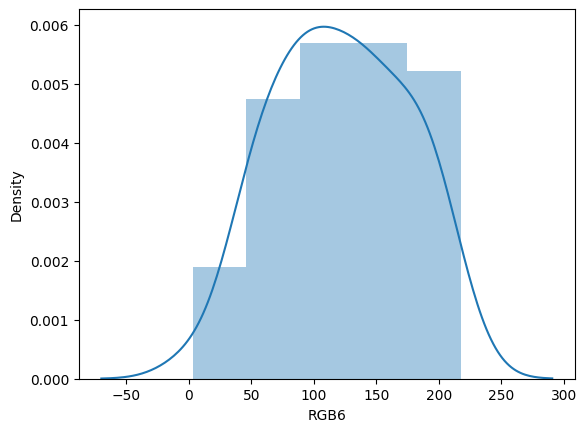

In [255]:
rgb6_std = data.RGB6.std()
print(rgb6_std)

sns.distplot(data.RGB6)

In [256]:
idxs = random.choices([i for i in range(data.shape[0])], k=20)

data_8 = data.iloc[idxs].copy()
data_8['RGB6'] = data_8['RGB6'] + [random.uniform(-rgb6_std, rgb6_std) for _ in range(20)]

#### RGB7

53.22188699661043


/var/folders/60/_l0csbys1fb0_r6rqk2whzgh0000gn/T/ipykernel_30542/2877785949.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.RGB7)


<Axes: xlabel='RGB7', ylabel='Density'>

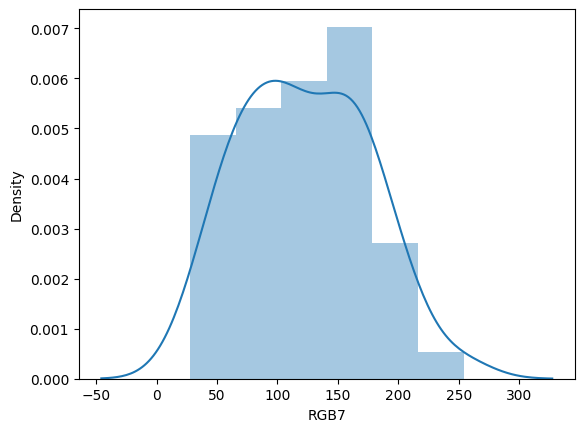

In [257]:
rgb7_std = data.RGB7.std()
print(rgb7_std)

sns.distplot(data.RGB7)

In [258]:
idxs = random.choices([i for i in range(data.shape[0])], k=20)

data_9 = data.iloc[idxs].copy()
data_9['RGB7'] = data_9['RGB7'] + [random.uniform(-rgb7_std, rgb7_std) for _ in range(20)]

#### dark_colors

3063.944284469503


/var/folders/60/_l0csbys1fb0_r6rqk2whzgh0000gn/T/ipykernel_30542/1660110711.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.dark_colors)


<Axes: xlabel='dark_colors', ylabel='Density'>

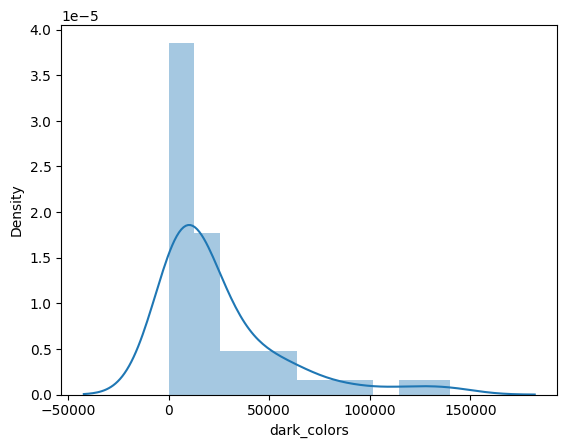

In [259]:
dark_colors_std = data.dark_colors.std() / 10
print(dark_colors_std)

sns.distplot(data.dark_colors)

In [260]:
idxs = random.choices([i for i in range(data.shape[0])], k=20)

data_10 = data.iloc[idxs].copy()
data_10['dark_colors'] = data_10['dark_colors'] + [random.uniform(-dark_colors_std, dark_colors_std) for _ in range(20)]

#### light_colors

578.1905922819925


/var/folders/60/_l0csbys1fb0_r6rqk2whzgh0000gn/T/ipykernel_30542/86675222.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.light_colors)


<Axes: xlabel='light_colors', ylabel='Density'>

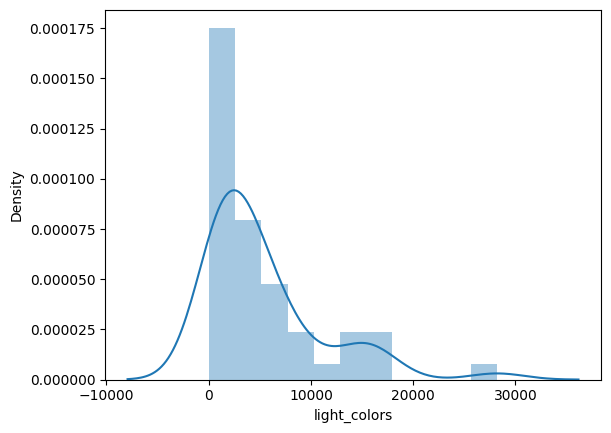

In [261]:
light_colors_std = data.light_colors.std() / 10
print(light_colors_std)

sns.distplot(data.light_colors)

In [262]:
idxs = random.choices([i for i in range(data.shape[0])], k=20)

data_11 = data.iloc[idxs].copy()
data_11['light_colors'] = data_11['light_colors'] + [random.uniform(-light_colors_std, light_colors_std) for _ in range(20)]

#### union

In [263]:
new_data = pd.concat([data, data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8, data_9, data_10, data_11])

In [264]:
new_data.shape

(269, 13)

In [265]:
new_data.reset_index(inplace=True, drop=True)

In [266]:
new_data.head(10)

,year,line_length,normalized_radius_sum,madness,RGB1,RGB2,RGB3,RGB4,RGB5,RGB6,RGB7,dark_colors,light_colors
0,1882,0.078886,0.041514,0.020408,53.000000,12.000000,37.666667,68.000000,21.333333,160.333333,82.666667,24302.0,2147.0
1,1883,0.058533,0.046067,0.040816,147.333333,107.333333,80.000000,135.333333,211.666667,155.000000,48.333333,2669.0,4062.0
2,1885,0.150776,0.047528,0.061224,67.333333,46.666667,38.666667,147.000000,190.333333,119.333333,62.000000,10376.0,564.0
3,1886,0.141838,0.047107,0.081633,49.000000,41.333333,99.666667,21.666667,156.000000,151.333333,85.000000,11828.0,1183.0
4,1888,0.120445,0.046078,0.102041,59.666667,91.666667,94.666667,148.333333,35.333333,136.333333,87.666667,6542.0,499.0
5,1889,0.084749,0.042019,0.122449,82.666667,165.333333,45.666667,133.666667,170.666667,45.333333,130.333333,8714.0,1555.0
6,1891,0.135889,0.047063,0.142857,175.000000,108.000000,126.666667,195.666667,75.000000,119.333333,109.000000,8327.0,4188.0
7,1892,0.105091,0.041940,0.163265,116.000000,49.666667,29.000000,136.333333,42.000000,162.666667,79.333333,46593.0,4920.0
8,1893,0.084394,0.045261,0.183673,99.333333,21.666667,6.000000,56.333333,36.666667,166.666667,118.333333,38022.0,6017.0
9,1894,0.073676,0.044885,0.204082,70.666667,73.666667,43.000000,45.333333,64.333333,102.333333,75.666667,38489.0,2366.0


In [267]:
new_data_sort = new_data.sort_values(by='year')
new_data_sort.reset_index(inplace=True, drop=True)
new_data_sort.head(10)

,year,line_length,normalized_radius_sum,madness,RGB1,RGB2,RGB3,RGB4,RGB5,RGB6,RGB7,dark_colors,light_colors
0,1882,0.078886,0.041514,0.020408,53.000000,12.000000,37.666667,68.000000,21.333333,160.333333,82.666667,24302.000000,2147.0
1,1882,0.086462,0.041514,0.020408,53.000000,12.000000,37.666667,68.000000,21.333333,160.333333,82.666667,24302.000000,2147.0
2,1882,0.078886,0.041514,0.020408,53.000000,2.047055,37.666667,68.000000,21.333333,160.333333,82.666667,24302.000000,2147.0
3,1882,0.078886,0.041514,0.020408,53.000000,17.088490,37.666667,68.000000,21.333333,160.333333,82.666667,24302.000000,2147.0
4,1882,0.078886,0.041514,0.020408,53.000000,12.000000,37.666667,68.000000,21.333333,160.333333,82.666667,27000.499504,2147.0
5,1882,0.078886,0.041514,0.020408,53.000000,12.000000,37.666667,68.000000,21.333333,202.573027,82.666667,24302.000000,2147.0
6,1882,0.078886,0.041514,0.020408,53.000000,12.000000,37.666667,68.000000,21.333333,173.109444,82.666667,24302.000000,2147.0
7,1883,0.062081,0.046067,0.040816,147.333333,107.333333,80.000000,135.333333,211.666667,155.000000,48.333333,2669.000000,4062.0
8,1883,0.068692,0.046067,0.040816,147.333333,107.333333,80.000000,135.333333,211.666667,155.000000,48.333333,2669.000000,4062.0
9,1883,0.077940,0.046067,0.040816,147.333333,107.333333,80.000000,135.333333,211.666667,155.000000,48.333333,2669.000000,4062.0


#### проверка, что мультиколлинеарности нет

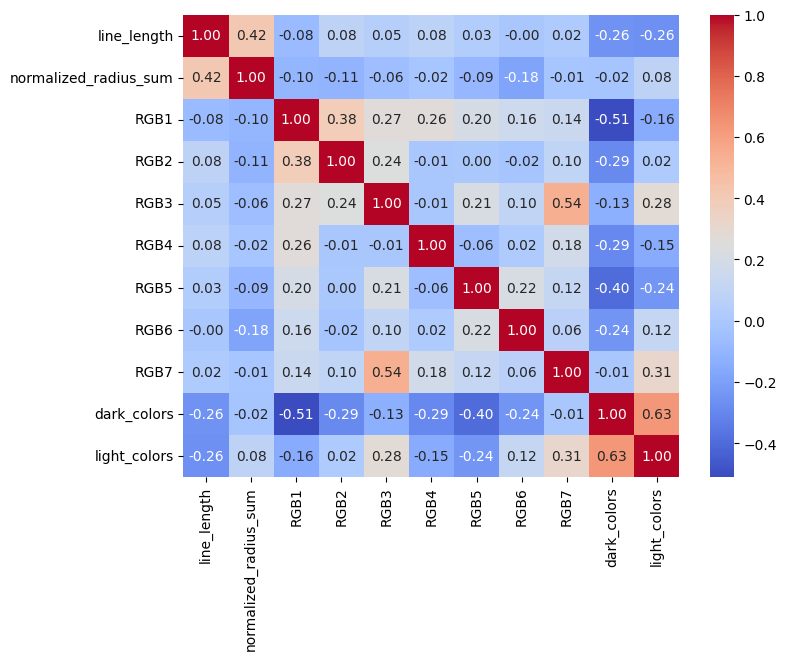

In [268]:
plt.figure(figsize=(8, 6))
sns.heatmap(new_data_sort.drop(columns=['year', 'madness']).corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.show()

In [271]:
new_data_sort.head(20)

,year,line_length,normalized_radius_sum,madness,RGB1,RGB2,RGB3,RGB4,RGB5,RGB6,RGB7,dark_colors,light_colors
0,1882,0.078886,0.041514,0.020408,53.000000,12.000000,37.666667,68.000000,21.333333,160.333333,82.666667,24302.000000,2147.000000
1,1882,0.086462,0.041514,0.020408,53.000000,12.000000,37.666667,68.000000,21.333333,160.333333,82.666667,24302.000000,2147.000000
2,1882,0.078886,0.041514,0.020408,53.000000,2.047055,37.666667,68.000000,21.333333,160.333333,82.666667,24302.000000,2147.000000
3,1882,0.078886,0.041514,0.020408,53.000000,17.088490,37.666667,68.000000,21.333333,160.333333,82.666667,24302.000000,2147.000000
4,1882,0.078886,0.041514,0.020408,53.000000,12.000000,37.666667,68.000000,21.333333,160.333333,82.666667,27000.499504,2147.000000
5,1882,0.078886,0.041514,0.020408,53.000000,12.000000,37.666667,68.000000,21.333333,202.573027,82.666667,24302.000000,2147.000000
6,1882,0.078886,0.041514,0.020408,53.000000,12.000000,37.666667,68.000000,21.333333,173.109444,82.666667,24302.000000,2147.000000
7,1883,0.062081,0.046067,0.040816,147.333333,107.333333,80.000000,135.333333,211.666667,155.000000,48.333333,2669.000000,4062.000000
8,1883,0.068692,0.046067,0.040816,147.333333,107.333333,80.000000,135.333333,211.666667,155.000000,48.333333,2669.000000,4062.000000
9,1883,0.077940,0.046067,0.040816,147.333333,107.333333,80.000000,135.333333,211.666667,155.000000,48.333333,2669.000000,4062.000000


In [270]:
new_data_sort.to_csv('aug_df_BGM.csv')